# Fit Rankine, Holland, Willoughby and Chavas profiles on SAR data
Note that so far the Rmax is searched in the first 200km around the TC center (in the code this impacts how the functions are initialized, but also when the curves are plot (on the smaller scale graph).

For the fitting, we constrain Rmax > 5km which works well for a lot of TCs. 

In the papers of Holland, Willoughby and Chavas, the wind used is the tangential wind (same for Rankine). 

TODO:

==> Translate Chavas by Vmin; DONE

==> Which profiles work when? etc...

==> Chavas looks worse, but this is because the other profiles use curve_fit(). Try to define the other profiles just with the input parameters. DONE


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
from scipy.optimize import curve_fit

import glob

import functions as f

In [2]:
### PATHS
# dir_path = '/home/arthur/data/cyclobs/rotated_files/clean_dataset/'
dir_path = '/home/arthur/data/cyclobs/rotated_files/clean_dataset/'
all_data = glob.glob(dir_path + "*.nc")
print("Total number of files:", len(all_data))
# Savepath to be modified directly in the function

### PARAMS
PARAMS = {
    'r_window_len':          501,  # Scale for radius (km)
    'rmax_window':           300,  # Window in whick we look for Rmax (e.g [0, 200km])
    'chavas_vfit':           17,
    'rank_hol_will_vmin':    True, 
    'chavas_vmin':           False, # Translates the profile from Vmin if True
    
    'use_curve_fit':         True,
    'tangential_wind_speed': True, # If False, total wind speed is used
    'print_values':          False, 
    
    'save_dir':              "/home/arthur/results/windProfiles/v3/"
    }

Total number of files: 322


In [3]:
# INITIALIZE DATA STRUCTURE
SPD = {
    'NE': [],
    'SE': [],
    'SW': [],
    'NW': []
}
INI = {           # Initial values
    'Rankine':    [], # x, alpha, Vmin, Rmax
    'Holland':    [], # Lat, pn, pc, Vmin, Rmax, Vmax
    'Willoughby': [], # n, X1, Vmin, Rmax, Vmax
    'Chavas':     []  # Vmax, Vmin, Rfit, Vfit, fcor, Cdvary, Cd, w_cool, CkCdvary, CkCd, eye_adj, alpha_eye
    } 
FIT = {           # Fit values
    'Rankine':    [], # x, alpha, Vmin, Rmax
    'Holland':    [], # Lat, pn, pc, Vmin, Rmax, Vmax
    'Willoughby': [], # n, X1, Vmin, Rmax, Vmax
    'Chavas':     []  # rr, VV, rmax, r0, rmerge, Vmerge
    }

1 =>     /home/arthur/data/cyclobs/rotated_files/clean_dataset/s1b-ew-owi-cm-20180902t143708-20180902t143912-000003-01720F_ll_gd_rotated.nc
<xarray.Dataset>
Dimensions:                             (lat: 1000, lon: 1000, x: 1000, y: 1000)
Coordinates:
    x_coords                            (x, y) int64 ...
    y_coords                            (x, y) int64 ...
    r_polar                             (x, y) float64 ...
    theta                               (x, y) float64 ...
    lon_coords                          (lon, lat) float64 ...
    lat_coords                          (lon, lat) float64 ...
Dimensions without coordinates: lat, lon, x, y
Data variables:
    nrcs_detrend_co                     (x, y) float32 ...
    incidence_angle                     (x, y) float32 ...
    nrcs_detrend_cross                  (x, y) float32 ...
    wind_from_direction                 (x, y) float32 ...
    nrcs_co                             (x, y) float32 ...
    heterogeneity_mask           

/home/arthur/scripts/windProfiles/symmetric/functions.py:653: RuntimeWarning: Mean of empty slice
  SPD[quadrant] = np.nanmean(spd[i:i + 90, :], axis=0)


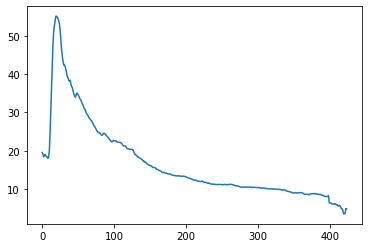

In [4]:
# FIT AND PRINT ALL THE PROFILES ON ALL THE DATA
i   = 0
for file in all_data[:1]:
    i += 1
    print(i, "=>    ", file)
    # Open file and compute mean wind speed in each quadrant
    ds  = xr.open_dataset(file)
    print(ds)
    SPD = f.compute_mean_tangential_wind_spd_quadrants(ds, SPD, PARAMS)
    r = np.arange(501)
    plt.plot(r, SPD['NE'])
    print(SPD['NE'])
    
    